# Experiment: Compare Previous Disengaged with Stim Interactions

**Goal**: See if interaction terms with both violation and trial not started history fits better than just single one of each or a combined version of them.

Additional Notes

Related notebooks:

* `2024_03_23_compare_prev_disengaged_stim_intrxs.ipynb`
* `2024_02_19_fit_filtered_prev_violation_stim_intrx.ipynb`

> Written by Jess Breda

Models being compared.

1. base model (psy track features)
2. base + prev tns + filt viol
3. base + prev tns + filt voil + prev tns x stim
4. base + prev tns + filt viol + filt viol x stim
5. base + prev tns + filt voil + prev tns x stim


## Imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment

from multiglm.experiments.experiment_compare_models import ExperimentCompareModels

from multiglm.features.design_matrix_generator import *
from multiglm.features.design_matrix_generator_PWM import *

from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression

from multiglm.visualizations.model_visualizer import *

from multiglm.data import ANIMAL_IDS
from multiglm.experiments import STANDARD_SIGMAS


sns.set_context("talk")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model Configs

### Compare 

In [9]:
# design matrix columns shared between all models being fit
shared_cols = {
    "session": lambda df: (copy(df.session)),
    "bias": lambda df: (add_bias_column(df)),
    "s_a": lambda df: (standardize(df.s_a)),
    "s_b": lambda df: (standardize(df.s_b)),
    "prev_avg_stim": lambda df: (prev_avg_stim(df, mask_prev_violation=True)),
    "prev_correct": lambda df: (prev_correct_side(df)),
    "prev_choice": lambda df: (prev_choice(df)),
    "labels": {"column_name": "choice"},
}


models_config = {
    "base": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
        },
    },
    "disengaged_terms": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_tns": lambda df: (prev_trial_not_started(df)),
            "filt_prev_viol": lambda df: (
                filtered_prev_viol(df, get_animals_tau(df, var_name="prev_violation"))
            ),
        },
    },
    "disengaged_tns_stim_intrx": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_tns": lambda df: (prev_trial_not_started(df)),
            "filt_prev_viol": lambda df: (
                filtered_prev_viol(df, get_animals_tau(df, var_name="prev_violation"))
            ),
            "sa_tns_intrx": lambda df: combine_two_cols(
                standardize(df.s_a), prev_trial_not_started(df), operator.mul
            ),
            "sb_tns_intrx": lambda df: combine_two_cols(
                standardize(df.s_b), prev_trial_not_started(df), operator.mul
            ),
        },
    },
    "disengaged_viol_stim_intrx": {
        "model_class": MultiClassLogisticRegression,
        "dmg_config": {
            **shared_cols,
            "prev_tns": lambda df: (prev_trial_not_started(df)),
            "filt_prev_viol": lambda df: (
                filtered_prev_viol(df, get_animals_tau(df, var_name="prev_violation"))
            ),
            "sa_viol_intrx": lambda df: combine_two_cols(
                standardize(df.s_a),
                filtered_prev_viol(df, get_animals_tau(df, var_name="prev_violation")),
                operator.mul,
            ),
            "sb_viol_intrx": lambda df: combine_two_cols(
                standardize(df.s_b),
                filtered_prev_viol(df, get_animals_tau(df, var_name="prev_violation")),
                operator.mul,
            ),
        },
    },
}

params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": STANDARD_SIGMAS,
    "random_state": 47,
    "eval_train": True,
    "null_mode": "multi",
    "model_config": models_config,
}

save_name = "2024_03_23_compare_prev_disengaged_stim_intrxs.pkl"

ORDER = [
    "base",
    "disengaged_terms",
    "disengaged_tns_stim_intrx",
    "disengaged_viol_stim_intrx",
]

## Run

In [10]:
experiment = ExperimentCompareModels(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']

 >>>> evaluating animal W051 <<<<

 ***** evaluating model base w/ sigma 0.07 *****
         Current function value: 64995.381251
         Iterations: 25
         Function evaluations: 116
         Gradient evaluations: 103

 ***** evaluating model base w/ sigma 0.13 *****
         Current function value: 64759.621472
         Iterations: 25
         Function evaluations: 107
         Gradient evaluations: 94

 ***** evaluating model base w/ sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 64687.335235
         Iterations: 24
         Function evaluations: 36
         Gradient evaluations: 36

 ***** evaluating model base w/ sigma 0.5 *****
         Current function value: 64667.068445
         Iterations: 22
         Function evaluations: 44
     

## Visualize

In [11]:
experiment = load_experiment(save_name)
mvc = ModelVisualizerCompare(experiment)

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_50264/2431235986.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for model_name, model_df in df.groupby("model_name"):
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beh

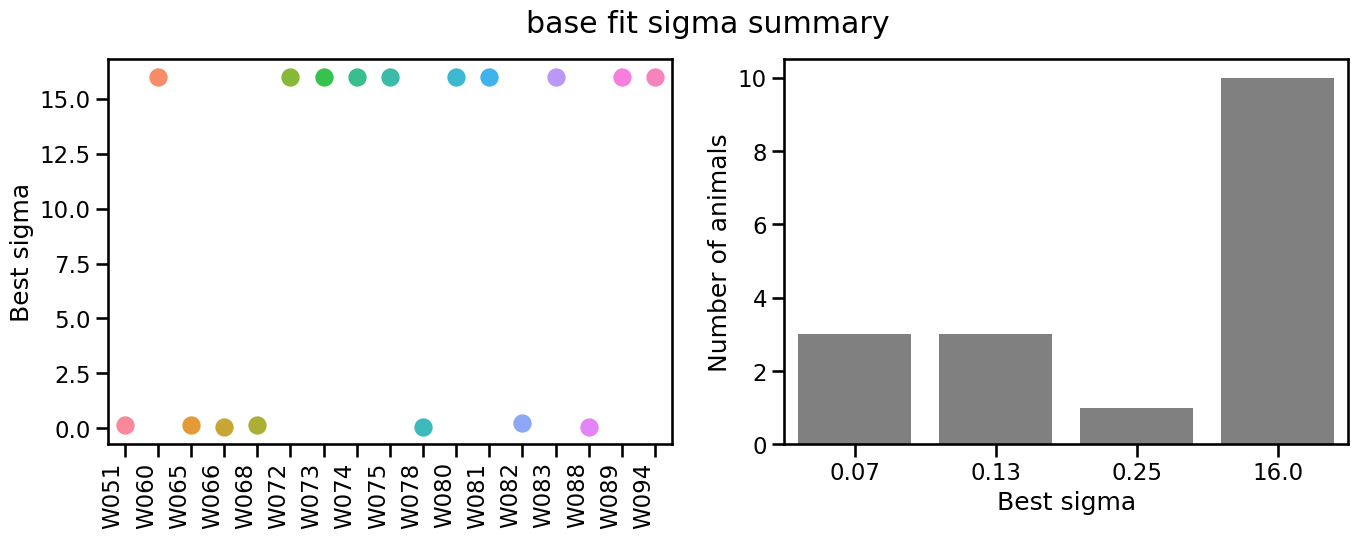

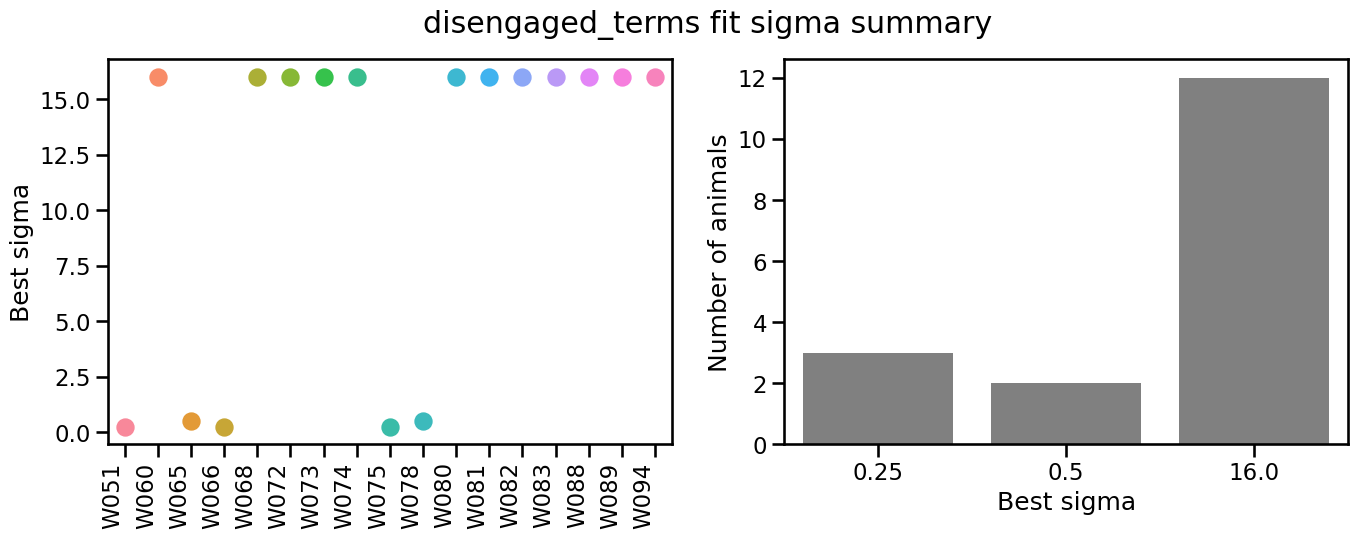

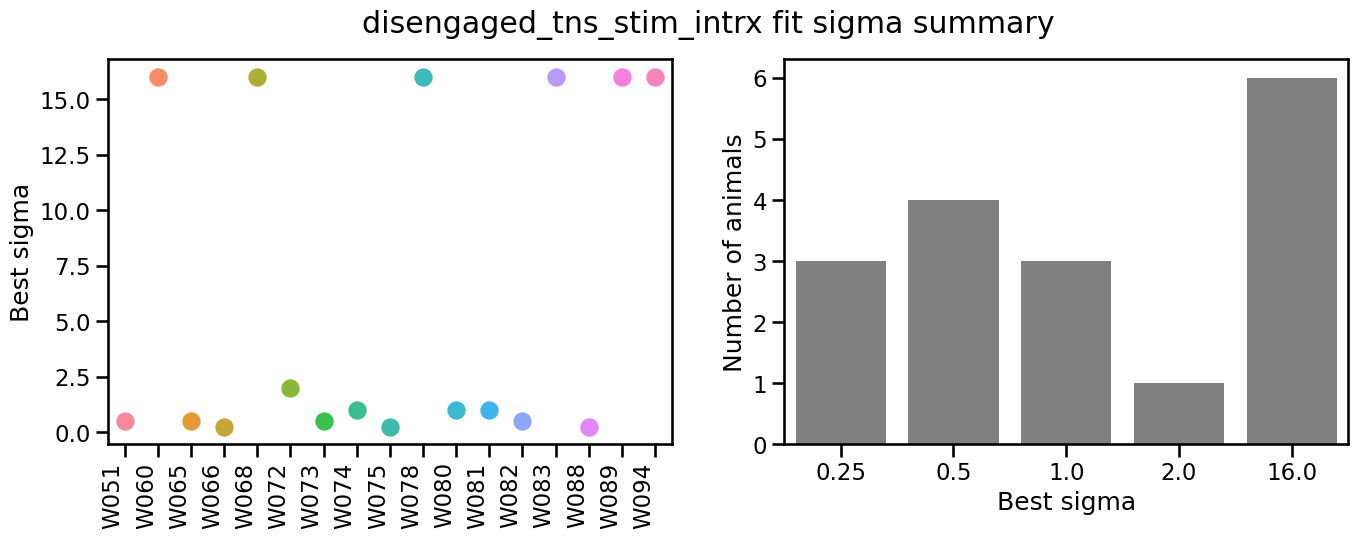

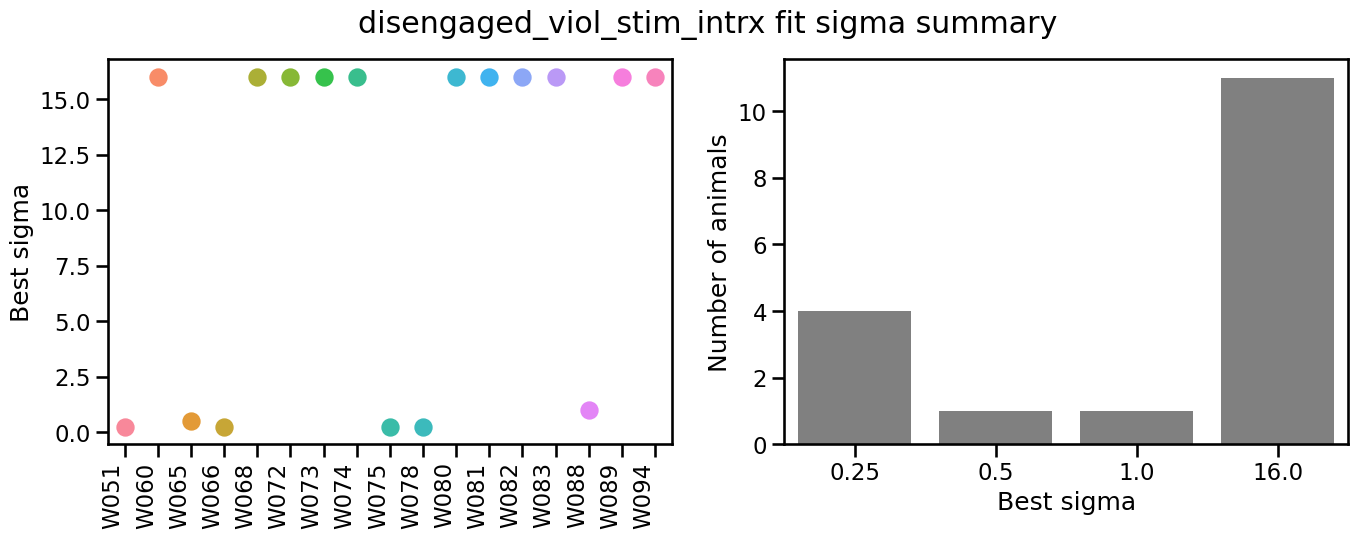

In [12]:
df = mvc.find_best_fit(group="model_name")
df["model_name"] = pd.Categorical(df["model_name"], categories=ORDER, ordered=True)
for model_name, model_df in df.groupby("model_name"):
    mvc.plot_sigma_summary(model_df, title=f"{model_name} fit sigma summary")

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_50264/2667047998.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ii, (model_name, model_df) in enumerate(best_fit_by_model.groupby("model_name")):


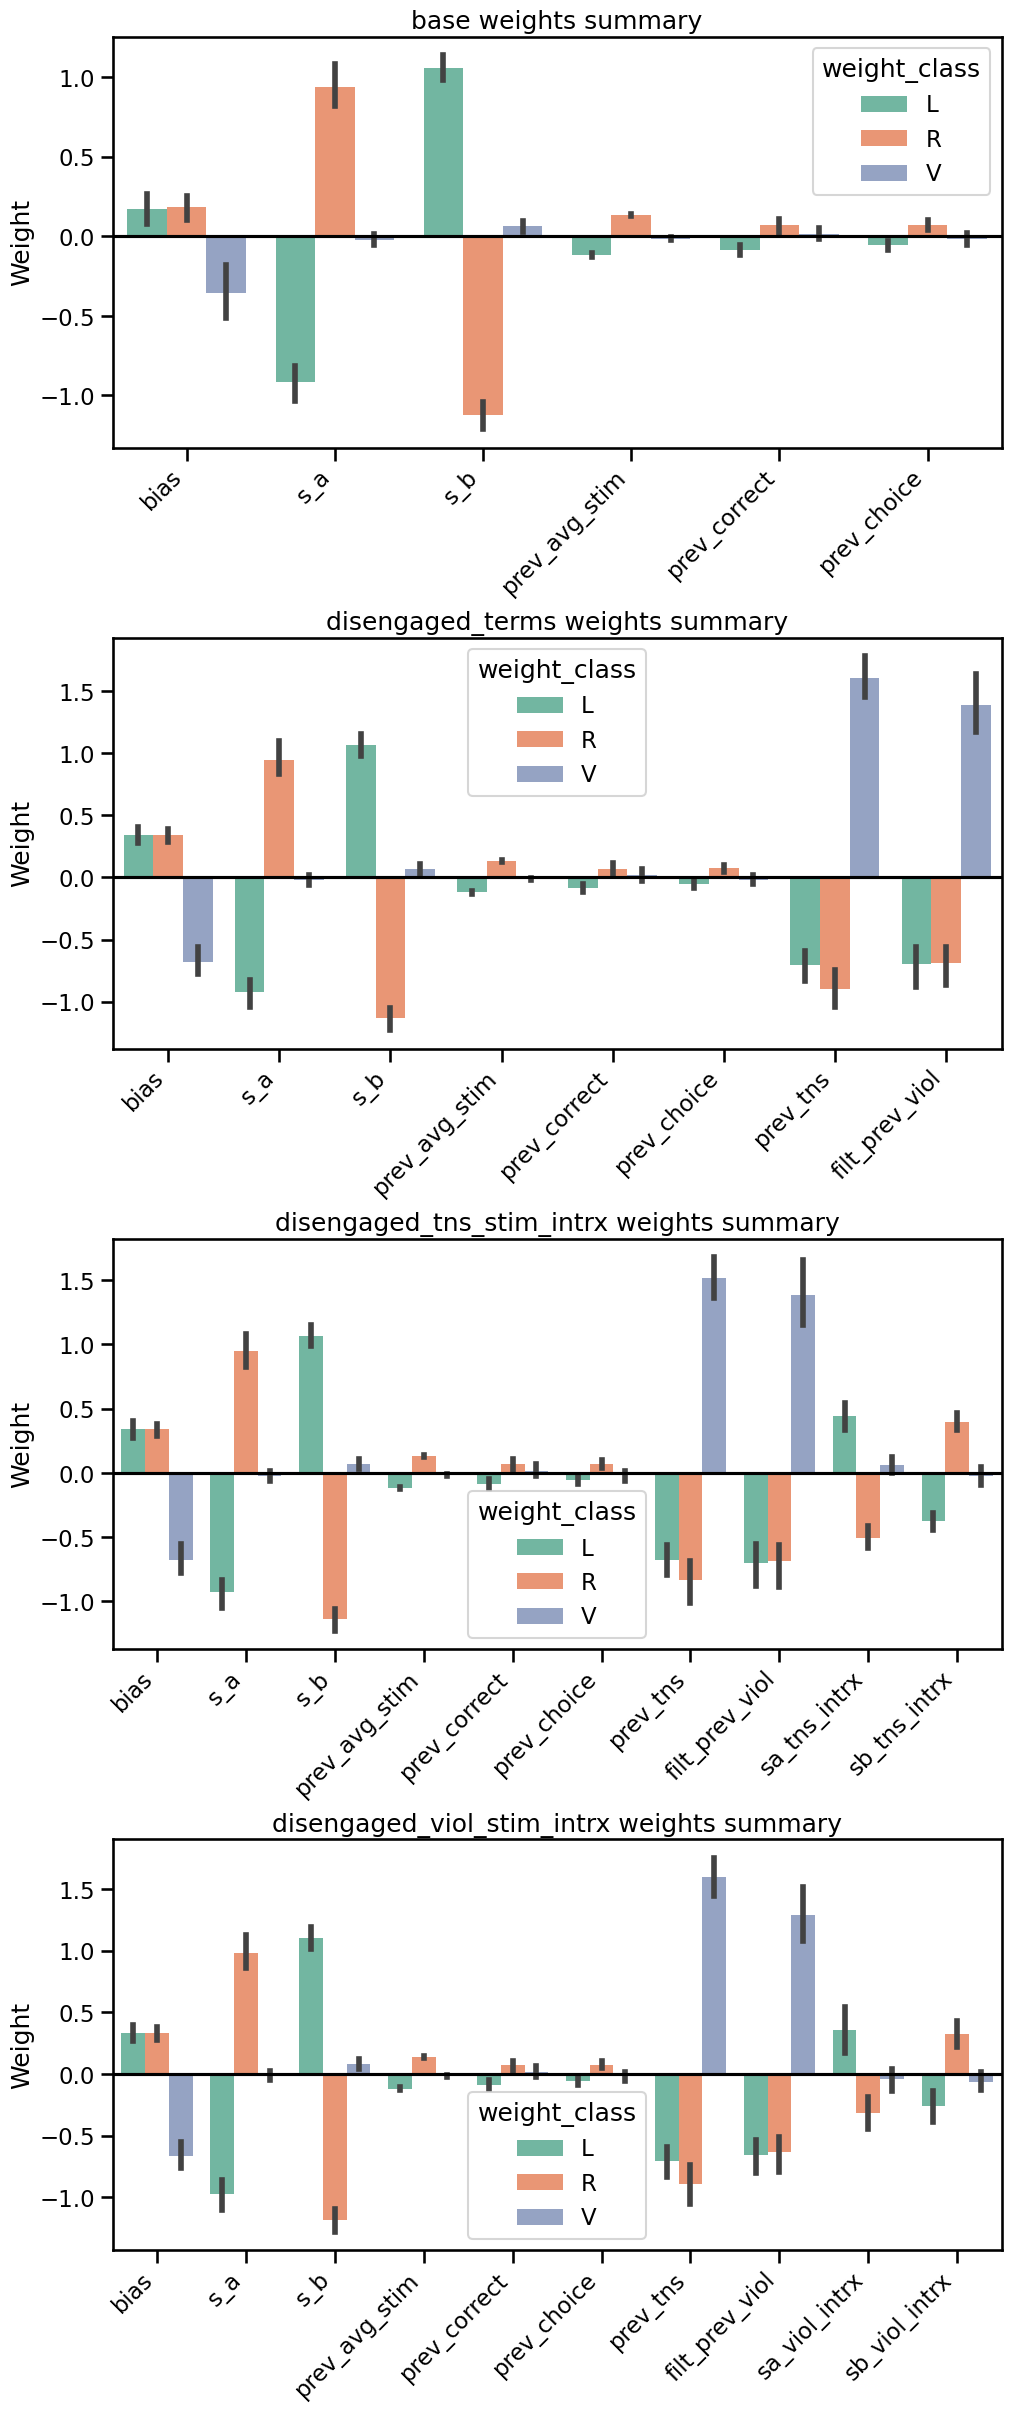

In [13]:
fig, ax = plt.subplots(
    len(ORDER), 1, figsize=(10, len(ORDER) * 6), constrained_layout=True, sharey=False
)

best_fit_by_model = mvc.find_best_fit(group=["animal_id", "model_name"])
best_fit_by_model["model_name"] = pd.Categorical(
    best_fit_by_model["model_name"], categories=ORDER, ordered=True
)

for ii, (model_name, model_df) in enumerate(best_fit_by_model.groupby("model_name")):
    unpacked = mvc.unpack_features_and_weights(model_df)

    mvc.plot_weights_summary(
        df=unpacked,
        ax=ax[ii],
        palette="Set2",
        title=f"{model_name} weights summary",
    )

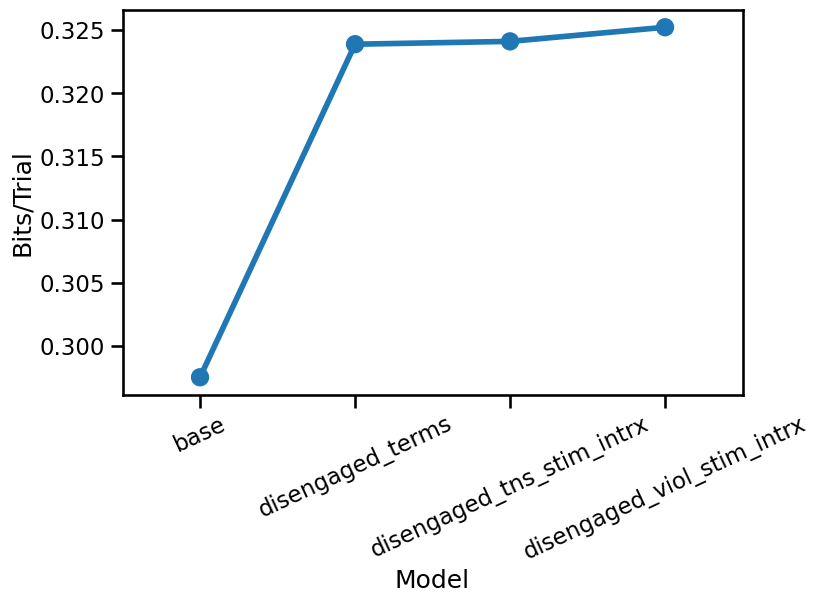

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=ORDER,
    errorbar=None,
)

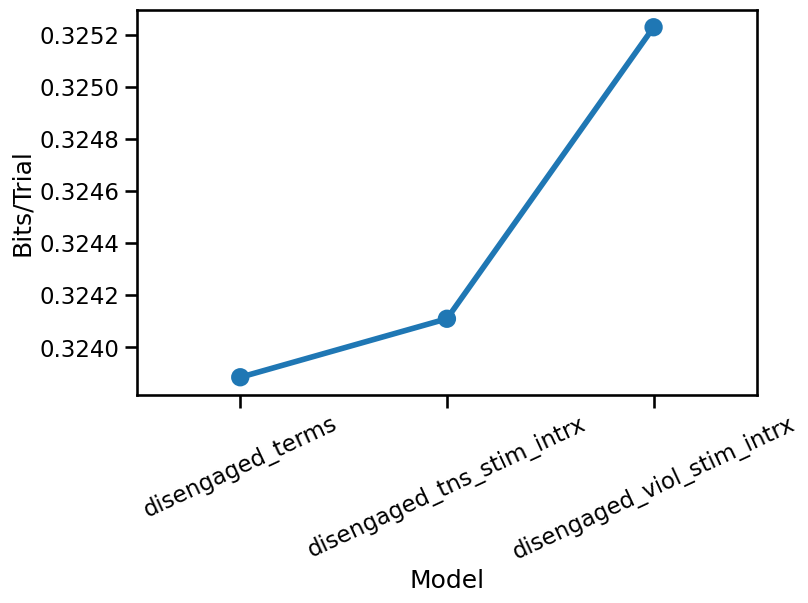

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=ORDER[1:],
    errorbar=None,
)

/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jessbreda/anaconda3/envs/an_lrn/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


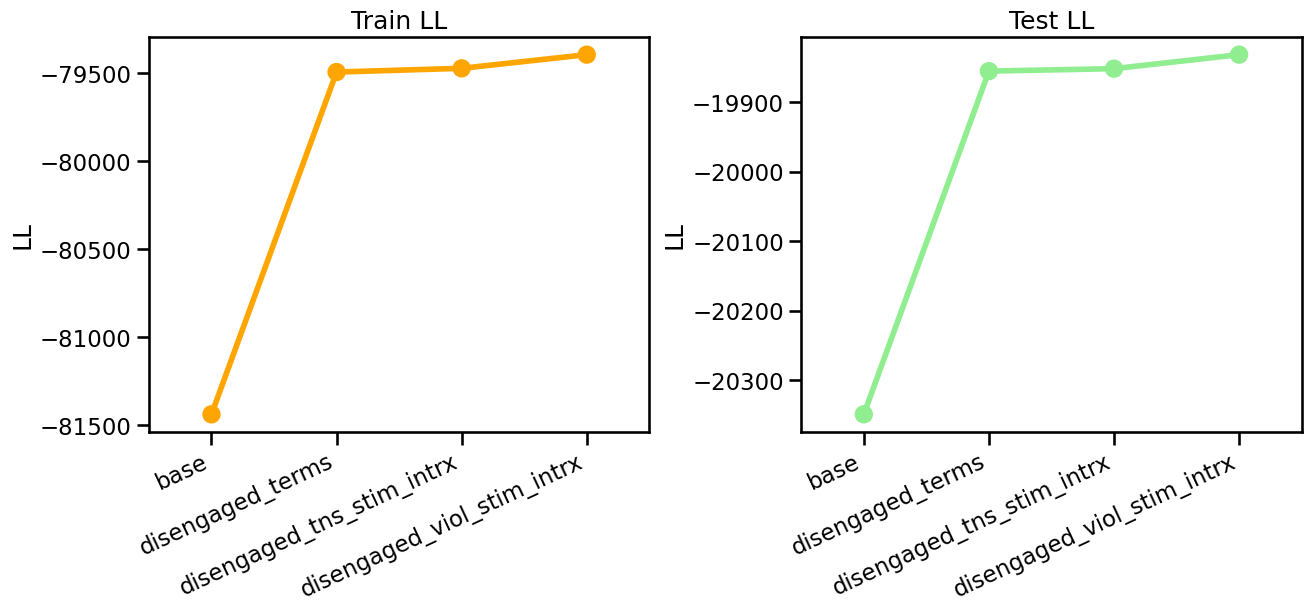

In [15]:
mvc.plot_train_and_test_ll(
    order=ORDER,
    errorbar=None,
)

<Axes: title={'center': 'Model Improvement- mu: 23.7 std: 29.96 \n disengaged_terms -> disengaged_viol_stim_intrx'}, xlabel='animal_id', ylabel='Delta test LL (new - base)'>

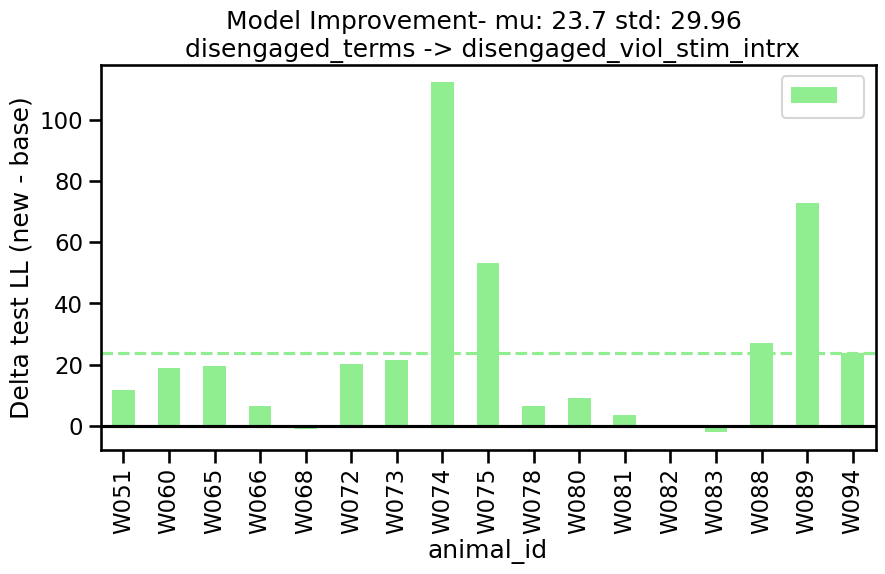

In [23]:
mvc.plot_ll_delta_by_animal(
    base_model_name=ORDER[1],
    new_model_name=ORDER[3],
    type="test",
)